# Challenge 9 - Step it UP!

## Random Forest Model to Predict Fire Spread

The user will be using a Jupyter Notebook to run code that was developed in R. First, the user will check to see if the wind speed and brightness are correlated with the speed that the fire spreads derived from the satellite data. The input data has been prepared for you. Next, the user will run the code that creates a model (random forest) using the features they select (windspeed and brightness) as the inputs and estimates the speed of spread as the target variable (speed of spread). They will train a model, record the Root Mean Squared Error, and save the model into a deployable format also known as Predictive Model Markup Language (PMML). 


## Install and Load Packages

In [1]:
# Install and load packages
install.packages('bit64')

also installing the dependency ‘bit’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(projectLib)

library(bit64)
library(httr)
library(jsonlite)


host <- "https://api.watsonwarriors.ai/workers/validate";

project <- projectLib::Project$new(,"94bcc7c7-c688-43db-98ec-1511d5126c70", "p-f2350d9931e1e7c66f5b1e646a33e56205b6553c")

library(randomForest)
library(caret)
library(data.table)
library(devtools)

install_git("git://github.com/jpmml/r2pmml.git")
library(r2pmml)

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
arithmetic operator: + - * / %/% %% ^
math: sign abs sqrt log log2 log10
math: floor ceiling trunc round
querying: is.integer64 is.vector [is.atomic} [length] format print str
values: is.na is.nan is.finite is.infinite
aggregation: any all min max range sum prod
cumulation: diff cummin cummax cumsum cumprod
access: length<- [ [<- [[ [[<-
combine: c rep cbi

✔  checking for file ‘/home/dsxuser/.tmp/Rtmp8L2pSA/file5371b2b3eaa/DESCRIPTION’ (382ms)
─  preparing ‘r2pmml’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘r2pmml_0.24.0.tar.gz’
   


## Get and View Data

In [3]:
# Get data
# https://github.com/watsonwarriors2020/challenges/raw/master/Challenge_7_Merged_Data_single_fire.csv
fireData = fread('https://raw.githubusercontent.com/watsonwarriors2020/challenges/master/Challenge_7_Merged_Data_single_fire.csv'
                 , data.table=FALSE
                 , header = TRUE
                 , stringsAsFactors = FALSE)

# Attach the column names
attach(fireData)

# Show data structure
str(fireData)

The following object is masked from package:base:

    version



'data.frame':	13818 obs. of  35 variables:
 $ SiteId                                    :integer64 2161142584 2161142584 2161142584 2161142584 2161142584 2161142584 2161142584 2161142584 ... 
 $ latitude                                  : num  36.5 36.5 36.5 36.5 36.5 ...
 $ longitude                                 : num  -122 -122 -122 -122 -122 ...
 $ DateHrGmt                                 : chr  "7/23/2016 3:00" "7/23/2016 3:00" "7/23/2016 3:00" "7/23/2016 3:00" ...
 $ DateHrLwt                                 : chr  "7/22/2016 20:00" "7/22/2016 20:00" "7/22/2016 20:00" "7/22/2016 20:00" ...
 $ WindSpeedMph                              : num  6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 ...
 $ WindDirectionDegrees                      : int  318 318 318 318 318 318 318 318 318 318 ...
 $ SurfaceWindGustsMph                       : num  36.8 36.8 36.8 36.8 36.8 36.8 36.8 36.8 36.8 36.8 ...
 $ ZeroToTenLiquidSoilMoisturePercent        : num  14 14 14 14 14 14 14 14 14 14 ...
 $ TenToFo

## Train a Random Forest Model and Display Accuracy

In [4]:
# Train model
set.seed(556)
modFit_rf <- randomForest(speed_mph~brightness + frp + WindSpeedMph, 
                          data = fireData,
                          nodesize = 5000,
                          ntree = 20,
                          trControl = trainControl(method = "cv", number = 10)
                          )

print(modFit_rf)

#RMSE
rmse <- round(postResample(fireData$speed_mph, predict(modFit_rf, fireData))[1],4)
answer_baseline <- rmse
answer_baseline


Call:
 randomForest(formula = speed_mph ~ brightness + frp + WindSpeedMph,      data = fireData, nodesize = 5000, ntree = 20, trControl = trainControl(method = "cv",          number = 10)) 
               Type of random forest: regression
                     Number of trees: 20
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1238816
                    % Var explained: 0.35


RMSE 
0.3517

## Make changes to the base model to improve the Root Mean Square Error for your model.

### There are three 


randomForest(x, 
    y=NULL,  
    xtest=NULL, 
    ytest=NULL, 
    ntree=500,
    mtry=if (!is.null(y) && !is.factor(y)) max(floor(ncol(x)/3), 1) else floor(sqrt(ncol(x))),
             replace=TRUE, 
             classwt=NULL, 
             cutoff, 
             strata,
             sampsize = if (replace) nrow(x) else ceiling(.632*nrow(x)),
             nodesize = if (!is.null(y) && !is.factor(y)) 5 else 1,
             maxnodes = NULL,
             importance=FALSE, 
             localImp=FALSE, 
             nPerm=1,
             proximity, 
             oob.prox=proximity,
             norm.votes=TRUE, 
             do.trace=FALSE,
             keep.forest=!is.null(y) && is.null(xtest), 
             corr.bias=FALSE,
             keep.inbag=FALSE, ...)
             


In [105]:
# Train model
set.seed(556)
modFit_rf <- randomForest(speed_mph~ 
   brightness 
#    + bright_t31 
   +   frp 
#  + RelativeHumidityPercent  
#  + SurfaceWetBulbTemperatureFahrenheit
   + WindSpeedMph                              
#    + SurfaceWindGustsMph                       
#  + ZeroToTenLiquidSoilMoisturePercent        
#  + TenToFortyLiquidSoilMoisturePercent       
#  + FortyToOneHundredLiquidSoilMoisturePercent
#  + SurfaceTemperatureFahrenheit         
#   + SurfaceDewpointTemperatureFahrenheit 
                         , data = fireData,
                           nodesize = 200,
                          ntree = 200,
                          trControl = trainControl(method = "cv", number = 10)
                          )

In [106]:
print(modFit_rf)

#RMSE
rmse <- round(postResample(fireData$speed_mph, predict(modFit_rf, fireData))[1],4)
answer_final <- rmse
answer_final


Call:
 randomForest(formula = speed_mph ~ brightness + frp + WindSpeedMph,      data = fireData, nodesize = 200, ntree = 200, trControl = trainControl(method = "cv",          number = 10)) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1155343
                    % Var explained: 7.07


RMSE 
0.3085

#### RMSE: 0.3517    <-- this is the value you want to improve. See if you can make it lower.

Call:
 randomForest(formula = speed_mph ~ brightness + frp + WindSpeedMph,      data = fireData, nodesize = 5000, ntree = 20, trControl = trainControl(method = "cv",          number = 10)) 
               Type of random forest: regression
                     Number of trees: 20
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1238816
                    % Var explained: 0.35





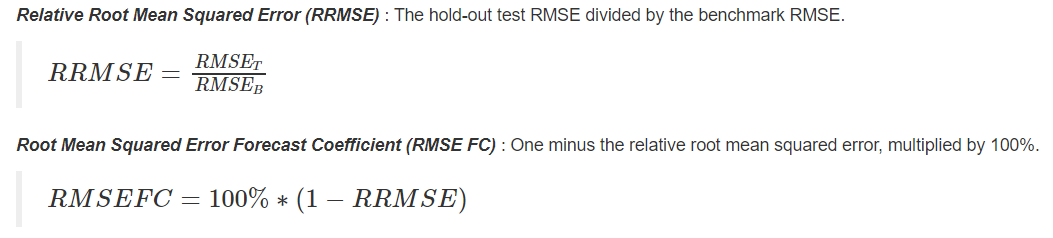

In [107]:
answers <- 100 * ( 1 - (answer_final / answer_baseline) )
answers

RMSE 
12.2832

## Export Predictive Model Markup Language file

In [96]:
# Export the model to PMML
r2pmml(modFit_rf, "modFit_rf_ch9.pmml")
#Export the PMML file to project storage
project$save_data('modFit_rf_ch9.xml', "modFit_rf_ch9.pmml", overwrite=TRUE)

$file_name
[1] "modFit_rf_ch9.xml"

$bucket_name
[1] "watsonswarriorstoeornottoe-donotdelete-pr-x8x6lctsymzwu0"

$message
[1] "File saved to project storage."

$asset_id
[1] "b383bf27-42a2-4a5c-8b9c-4f7528d239b5"

## Complete Challenge

In [ ]:
## Paste validation code below
